In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
from scipy import integrate
from scipy import special
import pandas as pd

In [2]:
# parameters
m = 100                                #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

In [3]:
def exp(a):
    return np.exp(-a**2)

In [4]:
teee=integrate.quad(exp,-np.inf,np.inf)

In [5]:
teee[0]

1.7724538509055159

In [6]:
integrate.quad(exp,-np.inf,np.inf)[0]

1.7724538509055159

In [7]:
integrate.quad(exp,-np.inf,np.inf)

(1.7724538509055159, 1.4202636780944923e-08)

In [8]:
np.sqrt(np.pi)

1.7724538509055159

In [9]:
#     Bessel functions
# kn(n, x[, out])    Modified Bessel function of the second kind of integer order n      *****
# kv(v, z[, out])    Modified Bessel function of the second kind of real order v       
# kve(v, z[, out])   Exponentially scaled modified Bessel function of the second kind.
# iv(v, z[, out])    Modified Bessel function of the first kind of real order.

#     Faster versions of common Bessel functions
# i0(x[, out])        Modified Bessel function of order 0.
# i1(x[, out])        Modified Bessel function of order 1.             ********
# k0(x[, out])        Modified Bessel function of the second kind of order 0,.
# k1(x[, out])        Modified Bessel function of the second kind of order 1,.

#      Integrals of Bessel functions
#iti0k0(x[, out])       Integrals of modified Bessel functions of order 0.
#it2i0k0(x[, out])      Integrals related to modified Bessel functions of order 0.


# K_i are the modified Bessel functions of order i !!!!

#I think in our case the K_i are the modified bessel function of second kind and order i...

In [10]:
def I(n,attempt):
    return special.kn(n,attempt)

In [11]:
attempt=np.linspace(0,5,1000)

In [12]:
test=I(1,attempt)

print(test)

[           inf 1.99785202e+02 9.98738730e+01 6.65638529e+01
 4.99046825e+01 3.99061436e+01 3.32381075e+01 2.84733465e+01
 2.48982287e+01 2.21162803e+01 1.98896089e+01 1.80668229e+01
 1.65469902e+01 1.52602316e+01 1.41566306e+01 1.31995801e+01
 1.23616229e+01 1.16217612e+01 1.09636619e+01 1.03744299e+01
 9.84374816e+00 9.36326410e+00 8.92614325e+00 8.52673923e+00
 8.16034626e+00 7.82301112e+00 7.51138841e+00 7.22262805e+00
 6.95428684e+00 6.70425833e+00 6.47071669e+00 6.25207152e+00
 6.04693099e+00 5.85407185e+00 5.67241459e+00 5.50100296e+00
 5.33898680e+00 5.18560776e+00 5.04018723e+00 4.90211606e+00
 4.77084595e+00 4.64588201e+00 4.52677639e+00 4.41312285e+00
 4.30455197e+00 4.20072716e+00 4.10134098e+00 4.00611215e+00
 3.91478275e+00 3.82711586e+00 3.74289350e+00 3.66191470e+00
 3.58399393e+00 3.50895964e+00 3.43665292e+00 3.36692639e+00
 3.29964318e+00 3.23467598e+00 3.17190623e+00 3.11122338e+00
 3.05252424e+00 2.99571233e+00 2.94069740e+00 2.88739489e+00
 2.83572550e+00 2.785614

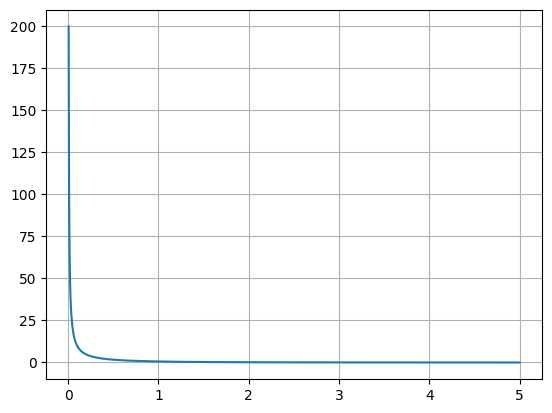

In [13]:
plt.plot(attempt,test)
plt.grid()

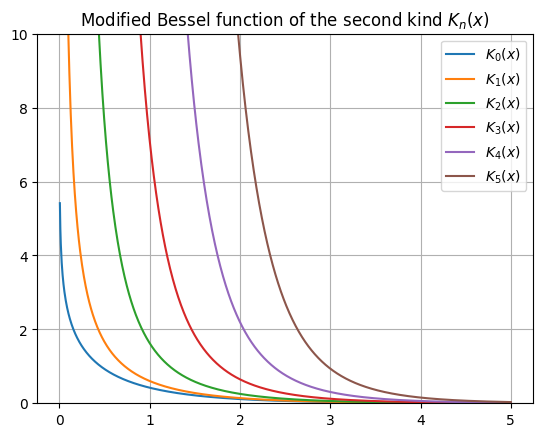

In [14]:
for N in range(6):
    plt.plot(attempt, special.kn(N, attempt), label='$K_{}(x)$'.format(N))
plt.ylim(0, 10)
plt.legend()
plt.title(r'Modified Bessel function of the second kind $K_n(x)$')
plt.grid()
plt.show()


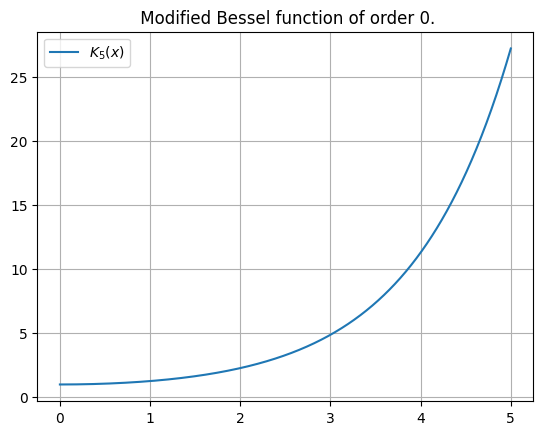

In [15]:

plt.plot(attempt, special.i0(attempt), label='$K_{}(x)$'.format(N))
plt.legend()
plt.title(r' Modified Bessel function of order 0.')
plt.grid()
plt.show()


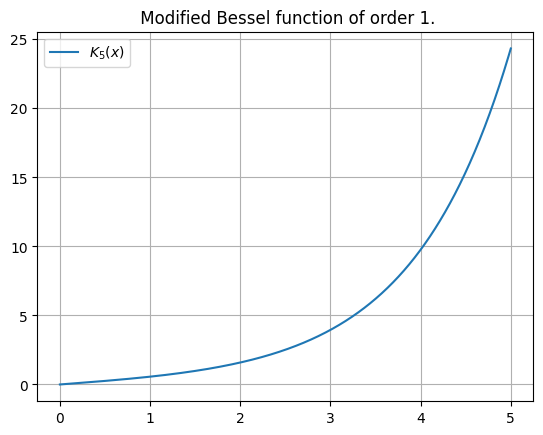

In [16]:
plt.plot(attempt, special.i1(attempt), label='$K_{}(x)$'.format(N))

plt.legend()
plt.title(r' Modified Bessel function of order 1.')
plt.grid()
plt.show()


In [17]:
attempt


array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

$$\langle \sigma v \rangle = \frac{1}{8m^4TK_2^2(m/T)} \int_{4m^2}^{\infty} \sigma(\tilde{s}-4m^2)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for usual WIMP DM

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{4m^2}^{\infty} \sigma(\tilde{s}-4m^2)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM

In [18]:
# LET'S BUILD THE DENOMINATOR

In [19]:
# in our care K_1,2 are the modified bessel functions of second kind and order 1 and 2

In [20]:
def DEN(x):
    T=m/x
    return 1/(8* m**4  *T *(special.kn(2,x))**2)

In [21]:
# IN PRINCIPLE x WAS MADE TO REACH 1000, BUT THE MODIFIED BESSEL FUNCTION GIVES PROBLEM

x=np.logspace(np.log10(1),np.log10(100),100)

In [22]:
x

array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.35160265,   3.51119173,
         3.67837977,   3.85352859,   4.03701726,   4.22924287,
         4.43062146,   4.64158883,   4.86260158,   5.09413801,
         5.33669923,   5.59081018,   5.85702082,   6.13590727,
         6.42807312,   6.73415066,   7.05480231,   7.39072203,
         7.74263683,   8.11130831,   8.49753436,   8.90215085,
         9.32603347,   9.77009957,  10.23531022,  10.72267222,
        11.23324033,  11.76811952,  12.32846739,  12.91549665,
        13.53047775,  14.17474163,  14.84968262,  15.55676144,
        16.29750835,  17.07352647,  17.88649529,  18.73

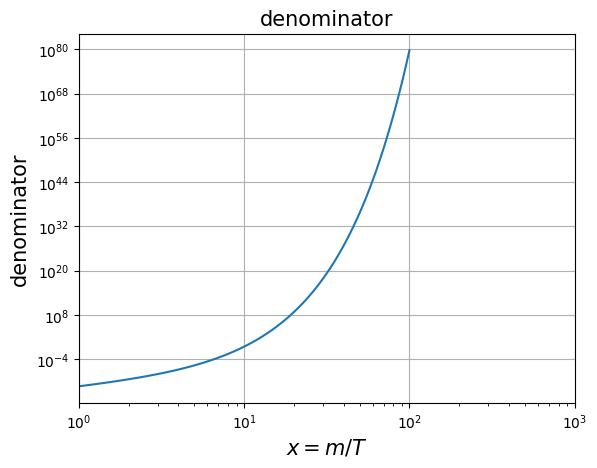

In [23]:
plt.plot(x,DEN(x))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [24]:
# LET'S BUILD THE NUMERATOR

$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [54]:
s_tilda=np.linspace(1,100,100)

In [76]:
def num(s,x):
    T=m/x
    for i in range(len(x)):
        return np.sqrt(s)* special.kn(1,np.sqrt(s)/T)

In [77]:
#def intnum(s,x):
#    return integrate.quad(num, 4 * m**2,np.inf, args=(1,))[0]

In [78]:
testing=integrate.quad(num, 4 * m**2,np.inf, args=(x,))[0]

TypeError: only size-1 arrays can be converted to Python scalars

In [79]:
print(size(x))

NameError: name 'size' is not defined

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

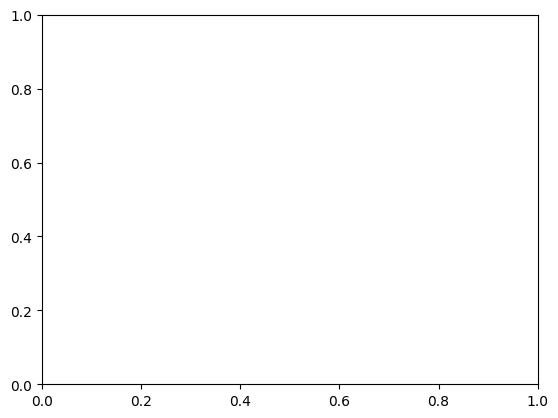

In [65]:
plt.plot(x,testing)